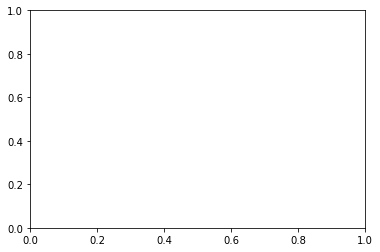

In [70]:
#Early imports
from scipy.stats import binom_test
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
import numpy as np
import pandas as pd

In [207]:
def reactome_binomial_results (subgroup_pathway, sub_group_size, master_pathway, p_value_threshold = 0.05, bin_type = 'greater'):
    '''
    Result to get pathways and see if they are significant results for our sample size.
    
    subgroup_pathway is a numby array composed of a zip of 3 lists:
        One for pathway name
        One for genes in subgroup for pathway
        One for genes in that specific pathway
        
    subgroup_size is the number of genes tested as part of that pathway
    
    master_pathway is big list of all pathways generated from reactome where we got the results.
    
    relevant gives a list of pathway name and p value of signficance
    
    '''
    
    
    relevant = []
    for idx, term in enumerate(subgroup_pathway):
        #print(term[0])
        for term2 in master_pathway:
            if term[0] == term2[0]:
                xed = int(term[1])
                ked = sub_group_size
                prob = int(term2[1])/int(term2[2])
                p_value = binom_test(xed, n = ked, p = prob, alternative = bin_type)
                if p_value <= p_value_threshold:
                    relevant.append((term[0], p_value))
        return relevant

In [216]:
# Values used in paper.
# Pathway counts are from reactome data results
male_pathways = ["interleukin-10 signaling", "Cytokine Signaling in Immune system", "Signaling by Interleukins", "Chemokine receptors bind chemokines", "Immune System", "GPCR ligand binding", "Peptide ligand-binding receptors", "GPCR downstream signalling", "Signalling by GPCR",  "G alpha (I) signalling events", "Class A/1"]
male_pathways_counts = [6, 7, 6, 3, 7, 4, 3 , 4, 3, 3, 3]
male_pathways_possible = [45, 804, 457, 57, 2249, 469, 198, 631, 706, 317, 333]
female_pathways = ["interleukin-10 signaling", "Signaling by Interleukins", "Cytokine Signaling in Immune system", "Immune System", "Chemokine receptors bind chemokines", "Interleukin-18 signaling", "Interleukin-4 and Interleukin-13 signaling", "Other interleuking signaling", "interleukin-1 family signaling", "Cellular Senescence" ]
female_pathways_counts = [8, 10, 11, 11, 3, 2, 3, 2, 3, 3] 
female_pathways_possible = [45, 457, 804, 2249, 57, 9, 111, 24, 142, 166]
female_all = np.array([y for y in zip(female_pathways, female_pathways_counts, female_pathways_possible)])
male_all = np.array([x for x in zip(male_pathways, male_pathways_counts, male_pathways_possible)])
print(male_all)
print(female_all)
total = 58
total_pathways = ["interleukin-10 signaling", "Signaling by Interleukins", "Cytokine Signaling in Immune system", "Immune System", "Chemokine receptors bind chemokines", "Interleukin-18 signaling", "Peptide ligand-binding receptors",  "GPCR downstream signalling", "Interleukin-4 and Interleukin-13 signaling", "Other interleuking signaling", "interleukin-1 family signaling", "Cellular Senescence", "Class A/1", 'G alpha (I) signalling events']
total_counts = [9, 11, 12, 12, 4, 2, 4, 5, 3, 2, 3, 3, 4, 3]
print(len(total_pathways), len(total_counts))
total_all = np.array([z for z in zip(total_pathways, total_counts, [total for n in range(len(total_pathways))])])
print(total_all)


[['interleukin-10 signaling' '6' '45']
 ['Cytokine Signaling in Immune system' '7' '804']
 ['Signaling by Interleukins' '6' '457']
 ['Chemokine receptors bind chemokines' '3' '57']
 ['Immune System' '7' '2249']
 ['GPCR ligand binding' '4' '469']
 ['Peptide ligand-binding receptors' '3' '198']
 ['GPCR downstream signalling' '4' '631']
 ['Signalling by GPCR' '3' '706']
 ['G alpha (I) signalling events' '3' '317']
 ['Class A/1' '3' '333']]
[['interleukin-10 signaling' '8' '45']
 ['Signaling by Interleukins' '10' '457']
 ['Cytokine Signaling in Immune system' '11' '804']
 ['Immune System' '11' '2249']
 ['Chemokine receptors bind chemokines' '3' '57']
 ['Interleukin-18 signaling' '2' '9']
 ['Interleukin-4 and Interleukin-13 signaling' '3' '111']
 ['Other interleuking signaling' '2' '24']
 ['interleukin-1 family signaling' '3' '142']
 ['Cellular Senescence' '3' '166']]
14 14
[['interleukin-10 signaling' '9' '58']
 ['Signaling by Interleukins' '11' '58']
 ['Cytokine Signaling in Immune system

In [218]:
# Males have 8 unique genes
# Cellular Senesence there are 3 genes part of this pathway
# Counted 14 genes for our experiment and there are 166 genes in the pathway in total
# Binom(3, 9, 14/166)
#print(male_all, total_all)

guys = reactome_binomial_results(male_all, 7, total_all)
gals = reactome_binomial_results(female_all, 11, total_all)
print(guys)
print(gals)

[('interleukin-10 signaling', 8.472308576714214e-05)]
[('interleukin-10 signaling', 3.556692837757805e-05)]


# Effort with All Gene Lists
## Trying with more panda dataframes to expand sample size. This proved inconclusive.

In [172]:
wut = pd.read_csv('result-Supplemental-Gene-NIHMS1622076.csv')

In [156]:
pathname = 'NIHMS1622076-supplement-1622076_Supp_Tab1.xlsx'

In [203]:
guys_more = reactome_binomial_results(male_all, 7, total_all, 0.05,'greater')
gals_more = reactome_binomial_results(female_all, 11, total_all, 0.05, 'greater')
print(guys_more) 
print(gals_more) 
guys_less = reactome_binomial_results(male_all, 7, total_all, 0.05,'less')
gals_less = reactome_binomial_results(female_all, 11, total_all, 0.05, 'less')
print(guys_less) 
print(gals_less) 
guys_two = reactome_binomial_results(male_all, 7, total_all, 0.05, 'two-sided')
gals_two = reactome_binomial_results(female_all, 11, total_all,  0.05, 'two-sided')
print(guys_two)
print(gals_two) 

('yo', 'interleukin-10 signaling')
('yo', 'interleukin-10 signaling')
[]
[]
('yo', 'interleukin-10 signaling')
('yo', 'interleukin-10 signaling')
[]
[]
('yo', 'interleukin-10 signaling')
('yo', 'interleukin-10 signaling')
[]
[]


In [212]:
wut.iloc[:50, 1:4]
total_pathways = ["interleukin-10 signaling", "Signaling by Interleukins", "Cytokine Signaling in Immune system", "Immune System", "Chemokine receptors bind chemokines", "Interleukin-18 signaling", "Peptide ligand-binding receptors",  "GPCR downstream signalling", "Interleukin-4 and Interleukin-13 signaling", "Other interleuking signaling", "interleukin-1 family signaling", "Cellular Senescence", "Class A/1", 'G alpha (I) signalling events']
total_counts = [36, 64, 65, 70, 21, 5, 21, 21, 32, 2, 10, 6, 21, 16 ]
total = 58
total_all = np.array([z for z in zip(total_pathways, total_counts, [total for n in range(len(total_pathways))])])

male_pathways = ["interleukin-10 signaling", "Cytokine Signaling in Immune system", "Signaling by Interleukins", "Chemokine receptors bind chemokines", "Immune System", "GPCR ligand binding", "Peptide ligand-binding receptors", "GPCR downstream signalling", "Signalling by GPCR",  "G alpha (I) signalling events", "Class A/1"]
male_pathways_counts = [6, 7, 6, 3, 7, 4, 3 , 4, 3, 3, 3]
male_pathways_possible = [45, 804, 457, 57, 2249, 469, 198, 631, 706, 317, 333]
female_pathways = ["interleukin-10 signaling", "Signaling by Interleukins", "Cytokine Signaling in Immune system", "Immune System", "Chemokine receptors bind chemokines", "Interleukin-18 signaling", "Interleukin-4 and Interleukin-13 signaling", "Other interleuking signaling", "interleukin-1 family signaling", "Cellular Senescence" ]
female_pathways_counts = [8, 10, 11, 11, 3, 2, 3, 2, 3, 3] 
female_pathways_possible = [45, 457, 804, 2249, 57, 9, 111, 24, 142, 166]
female_all = np.array([y for y in zip(female_pathways, female_pathways_counts, female_pathways_possible)])
male_all = np.array([x for x in zip(male_pathways, male_pathways_counts, male_pathways_possible)])



In [213]:
guys_more = reactome_binomial_results(male_all, 7, total_all, 0.05,'greater')
gals_more = reactome_binomial_results(female_all, 11, total_all, 0.05, 'greater')
print(guys_more) 
print(gals_more) 
guys_less = reactome_binomial_results(male_all, 7, total_all, 0.05,'less')
gals_less = reactome_binomial_results(female_all, 11, total_all, 0.05, 'less')
print(guys_less) 
print(gals_less) 
guys_two = reactome_binomial_results(male_all, 7, total_all, 0.05, 'two-sided')
gals_two = reactome_binomial_results(female_all, 11, total_all,  0.05, 'two-sided')
print(guys_two)
print(gals_two) 


[]
[]
[]
[]
[]
[]


In [187]:
dataframes = pd.read_excel(pathname)
dataframes.iloc[22, 80:]
gene_list = []
for term in dataframes.iloc[22, 80:]:
    gene_list.append(term.strip(' ').split('or')[0].split('AND')[0].split('/')[0].split('And')[0].split('Or')[0])
for termy in gene_list:
    print(termy + '')
total = len(gene_list) - 3
print(total_all)

IFNy
IL1a
IL1b
IL1RA
IL2
IL3
IL4
IL5
IL6
IL7
IL8
IL9
IL10
IL12p40
IL12p70
IL13
IL15
IL17A
IL17E
IL17F
IL18
IL22
IL27
CXCL10
CCL2
CCL7
MCSF
CCL22
CXCL9
CCL3
CCL4
PDGFAA
PDGFAB
CCL5
TGFa
TNFa
TNFb
VEGFA
Eotaxin2
CCL8
CXCL13
CCL13
CCL1
IL16
CCL17
CCL21
Eotaxin3
LIF
TPO
SCF
TSLP
IL33
IL20
IL21
IL23
TRAIL
CCL27
SDF1a
CXCL5
CCL15
IFNL2
[['interleukin-10 signaling' '36' '58']
 ['Signaling by Interleukins' '64' '58']
 ['Cytokine Signaling in Immune system' '65' '58']
 ['Immune System' '70' '58']
 ['Chemokine receptors bind chemokines' '21' '58']
 ['Interleukin-18 signaling' '5' '58']
 ['Peptide ligand-binding receptors' '21' '58']
 ['GPCR downstream signalling' '21' '58']
 ['Interleukin-4 and Interleukin-13 signaling' '32' '58']
 ['Other interleuking signaling' '2' '58']
 ['interleukin-1 family signaling' '10' '58']
 ['Cellular Senescence' '6' '58']
 ['Class A/1' '21' '58']
 ['G alpha (I) signalling events' '16' '58']]


# Gene List Final
#Gene names from paper
IL1a
IL1b
IL1RA
IL2
IL3
IL4
IL5
IL6
IL7
IL8
IL9
IL10
IL12b
IL13
IL15
IL17A
IL17E
IL17F
IL18
IL22
IL27
CXCL10
CCL2
CCL7
CSF1
CCL22
CXCL9
CCL3
CCL4
PDGFAA
PDGFR
CCL5
TGFa
TNFa
TNFb
VEGFA
CCL26
CXCL13
CCL13
CCL1
IL16
CCL17
CCL21
CCL16
LIF
TPO
SCF
TSLP
IL33
IL20
IL21
IL23a
TRAIL
CCL27
SDF1a
CXCL5
IFNL2



In [214]:
print(len(gene_list))

61
